# 전국 사고 데이터(countrywide_accident) 기초 탐색 (EDA)

이 노트북에서는 **대구 공공데이터 시각화 프로젝트**에서 사용되는  
`countrywide_accident.csv` (전국 사고 데이터셋)에 대해 다음 내용을 실습합니다.

1. `df.head(10)` 및 기본 요약 정보  
   - 사고 데이터셋 전체 행 수  
   - 전체 컬럼 수  
   - 평균 결측값 비율(%)  
2. `df.info()`를 통한 컬럼 구조·타입 확인  
3. **수치형 / 범주형 컬럼 자동 분리**  
4. 수치형 컬럼에 대한 **히스토그램 + 박스플롯**  
5. 범주형 컬럼에 대한 **히스토그램(bar chart)**

이 노트북은 이후 Streamlit 대시보드에서 사고 데이터 탭을 구현하기 전에  
Colab에서 데이터 구조를 먼저 검증하는 용도입니다.


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (30.7 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
matplotlibrc 경로: /usr/local/lib/py

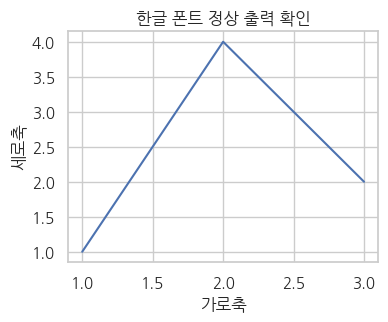

In [ ]:
# ==========================================
# 1. 한글 출력을 위한 기초 셀
# ==========================================

!apt-get update -qq
!apt-get install -y fonts-nanum

import matplotlib as mpl
print("matplotlibrc 경로:", mpl.matplotlib_fname())

import shutil
import matplotlib as mpl

root = mpl.matplotlib_fname().replace("matplotlibrc", "")
target_font = root + "fonts/ttf/DejaVuSans.ttf"
print("matplotlib 기본 폰트 파일:", target_font)

nanum_font = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
shutil.copyfile(nanum_font, target_font)
print("기본 폰트를 나눔고딕으로 교체 완료")

!rm -rf ~/.cache/matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(4,3))
plt.title("한글 폰트 정상 출력 확인")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.plot([1,2,3], [1,4,2])
plt.show()

In [ ]:
# ==========================================
# 2. 기본 라이브러리 임포트
# ==========================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 깨짐 방지


## 3. 사고 데이터셋(countrywide_accident) 로드

`countrywide_accident.csv`는 Colab에서 **직접 업로드**하는 방식으로 불러옵니다.

- 실습 참여자가 각자 로컬에 있는 CSV를 업로드  
- 또는 구글 드라이브에 올려두고 경로를 바꾸어 사용할 수도 있습니다.


In [ ]:
# ==========================================
# 3. countrywide_accident.csv 업로드 및 로드
# ==========================================
from google.colab import files

print("countrywide_accident.csv 파일을 선택해서 업로드 해주세요.")
uploaded = files.upload()

print("업로드된 파일 목록:", list(uploaded.keys()))
file_name = list(uploaded.keys())[0]
print("사용할 파일 이름:", file_name)

def read_csv_safe(path, encodings=["utf-8", "utf-8-sig", "cp949"]):
    """
    여러 인코딩을 시도하면서 CSV 파일을 안전하게 읽기 위한 함수.
    """
    last_error = None
    for enc in encodings:
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception as e:
            last_error = e
            print(f"[경고] 인코딩 {enc} 로 읽기 실패: {e}")
            continue
    raise ValueError(f"CSV를 어떤 인코딩으로도 읽을 수 없습니다. 마지막 에러: {last_error}")

df = read_csv_safe(file_name)

print("데이터 로딩 완료!")
print("데이터 형태 (행, 열):", df.shape)


countrywide_accident.csv 파일을 선택해서 업로드 해주세요.


Saving countrywide_accident.csv to countrywide_accident.csv
업로드된 파일 목록: ['countrywide_accident.csv']
사용할 파일 이름: countrywide_accident.csv
데이터 로딩 완료!
데이터 형태 (행, 열): (602775, 23)


In [ ]:
# ==========================================
# 4. 데이터 상위 10행 및 기본 요약 정보
# ==========================================

print("=== 사고 데이터셋 상위 10행 (head(10)) ===")
display(df.head(10))

print("\n=== 사고 데이터셋 기본 요약 ===")
total_rows = df.shape[0]
total_cols = df.shape[1]
missing_ratio = df.isnull().mean().mean() * 100  # 전체 평균 결측 비율(%)

print(f"사고 데이터셋 전체 행 수: {total_rows:,}")
print(f"전체 컬럼 수: {total_cols:,}")
print(f"평균 결측값 비율: {missing_ratio:.2f}%")

# 기대 예시 (실제 데이터 기준):
# 사고 데이터셋 전체 행 수: 602,775
# 전체 컬럼 수: 23
# 평균 결측값 비율: 0.70%


=== 사고 데이터셋 상위 10행 (head(10)) ===


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,COUNTRYWIDE_ACCIDENT_000000,2019-01-01 00,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,40세,경상,0,0,1,0,3
1,COUNTRYWIDE_ACCIDENT_000001,2019-01-01 00,화요일,맑음,경기도 포천시 소흘읍,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,...,상해없음,이륜,남,20세,경상,0,0,1,0,3
2,COUNTRYWIDE_ACCIDENT_000002,2019-01-01 00,화요일,맑음,경기도 양주시 고암동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,17세,중상,0,1,0,0,5
3,COUNTRYWIDE_ACCIDENT_000003,2019-01-01 00,화요일,맑음,경기도 남양주시 다산동,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,10세,중상,0,2,0,0,10
4,COUNTRYWIDE_ACCIDENT_000004,2019-01-01 00,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,56세,경상,0,0,2,1,7
5,COUNTRYWIDE_ACCIDENT_000005,2019-01-01 00,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로부근,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,기타불명,보행자,남,27세,경상,0,0,1,0,3
6,COUNTRYWIDE_ACCIDENT_000006,2019-01-01 00,화요일,맑음,전라남도 순천시 조례동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
7,COUNTRYWIDE_ACCIDENT_000007,2019-01-01 00,화요일,맑음,충청남도 천안시 동남구 목천읍,교차로 - 교차로부근,건조,차대차,기타,안전운전불이행,...,상해없음,승용,남,30세,경상,0,0,2,0,6
8,COUNTRYWIDE_ACCIDENT_000008,2019-01-01 00,화요일,맑음,광주광역시 광산구 수완동,단일로 - 기타,건조,차대차,기타,중앙선침범,...,상해없음,이륜,남,31세,경상,0,0,1,0,3
9,COUNTRYWIDE_ACCIDENT_000009,2019-01-01 00,화요일,맑음,경기도 화성시 우정읍,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,이륜,남,60세,중상,0,1,0,0,5



=== 사고 데이터셋 기본 요약 ===
사고 데이터셋 전체 행 수: 602,775
전체 컬럼 수: 23
평균 결측값 비율: 0.75%


In [ ]:
# ==========================================
# 5. df.info()로 전체 스키마 확인
# ==========================================
print("=== 사고 데이터셋 info() ===")
df.info()


=== 사고 데이터셋 info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602775 entries, 0 to 602774
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           602775 non-null  object
 1   사고일시         602775 non-null  object
 2   요일           602775 non-null  object
 3   기상상태         602775 non-null  object
 4   시군구          602775 non-null  object
 5   도로형태         602775 non-null  object
 6   노면상태         602774 non-null  object
 7   사고유형         602775 non-null  object
 8   사고유형 - 세부분류  602775 non-null  object
 9   법규위반         602775 non-null  object
 10  가해운전자 차종     602775 non-null  object
 11  가해운전자 성별     602775 non-null  object
 12  가해운전자 연령     602775 non-null  object
 13  가해운전자 상해정도   602775 non-null  object
 14  피해운전자 차종     576948 non-null  object
 15  피해운전자 성별     576946 non-null  object
 16  피해운전자 연령     576949 non-null  object
 17  피해운전자 상해정도   576946 non-null  object
 18  사망자수         602775 n

## 6. 수치형 / 범주형 컬럼 분리

사고 데이터에서도 **수치형 / 범주형 컬럼을 자동으로 분리**합니다.

- 수치형: 사고 건수, 사상자 수, 속도, 거리 등  
- 범주형: 도로 유형, 기상 상태, 요일, 사고 유형 등  

이 구분을 기준으로  
수치형은 히스토그램 + 박스플롯,  
범주형은 bar chart(히스토그램)를 그립니다.


In [ ]:
# ==========================================
# 6. 수치형 / 범주형 컬럼 분리
# ==========================================

numeric_cols = df.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("=== 수치형 컬럼 목록 ===")
print(numeric_cols)

print("\n=== 범주형 컬럼 목록 ===")
print(categorical_cols)


=== 수치형 컬럼 목록 ===
['사망자수', '중상자수', '경상자수', '부상자수', 'ECLO']

=== 범주형 컬럼 목록 ===
['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']


## 7. 수치형 변수에 대한 히스토그램 & 박스플롯

각 수치형 컬럼에 대해

- **히스토그램**: 분포 전체 모양 확인  
- **박스플롯(Box Plot)**: 중앙값, 사분위수, 이상치 여부 확인  

사고 데이터의 **분포 특성**(예: 고도, 사상자 수, 차량 수 등)을 한눈에 파악할 수 있습니다.


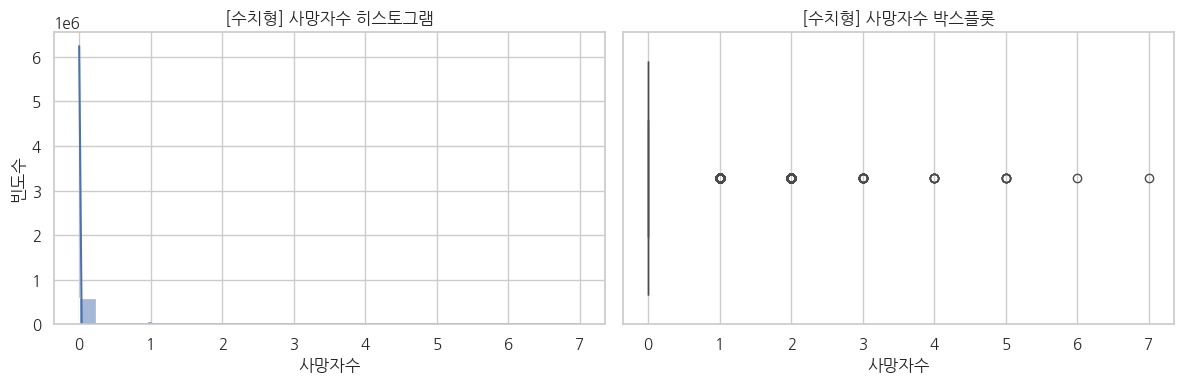

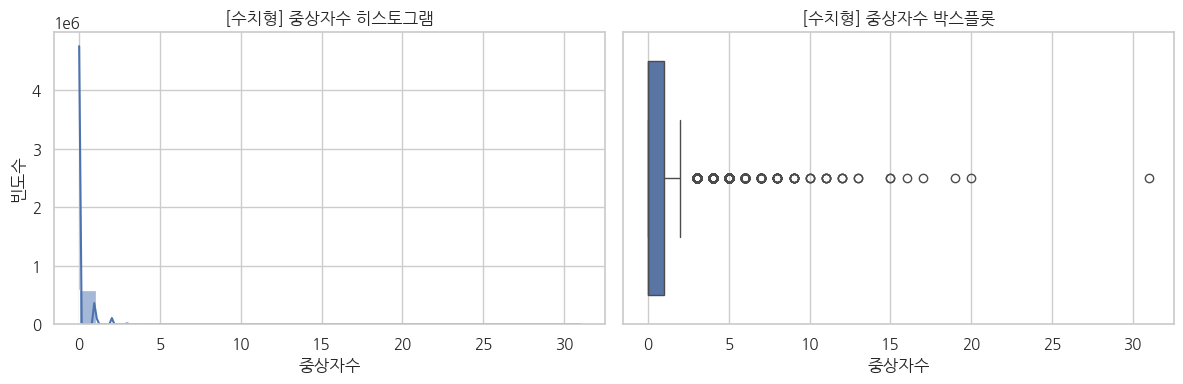

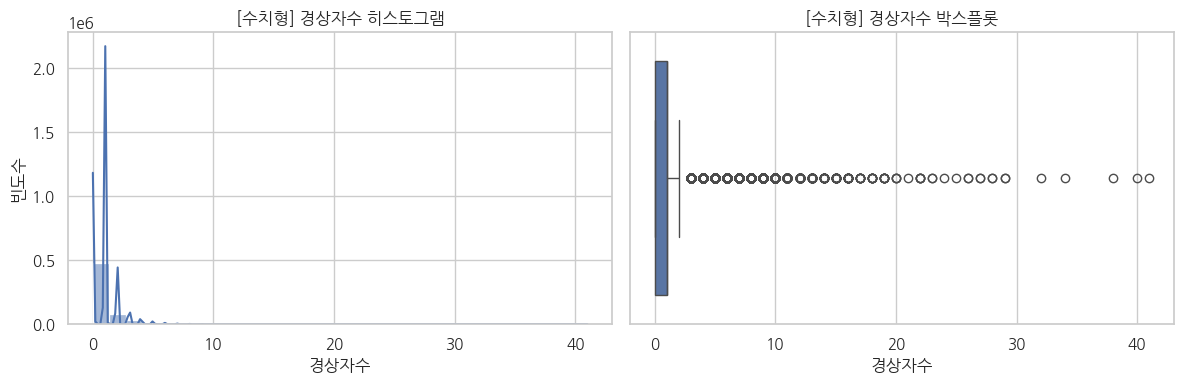

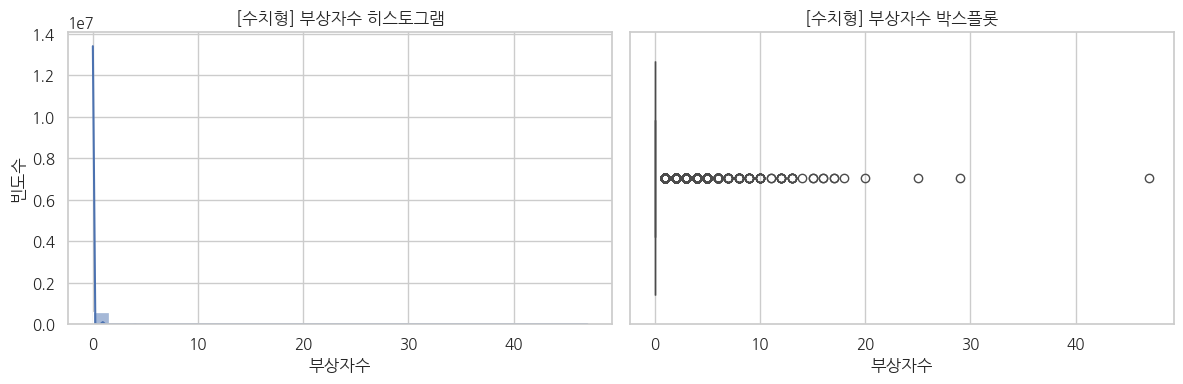

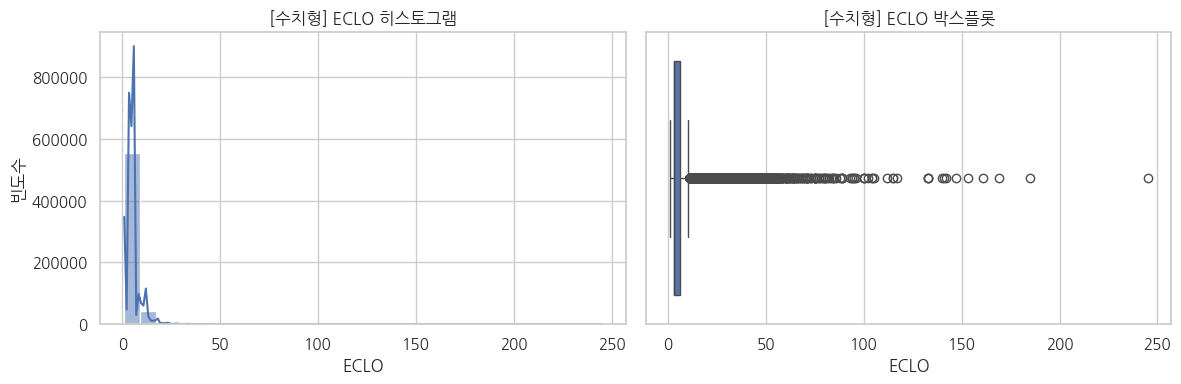

In [ ]:
# ==========================================
# 7. 모든 수치형 컬럼 히스토그램 + 박스플롯
# ==========================================

if len(numeric_cols) == 0:
    print("수치형 컬럼이 없어 시각화를 수행할 수 없습니다.")
else:
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # 히스토그램
        sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[0])
        axes[0].set_title(f"[수치형] {col} 히스토그램")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("빈도수")

        # 박스플롯
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f"[수치형] {col} 박스플롯")
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()


## 8. 범주형 변수에 대한 히스토그램(bar chart)

범주형 컬럼은 **각 값이 몇 번 등장하는지(빈도)**를 보는 것이 핵심입니다.

- 예: 사고 유형, 노면 상태, 기상 상태, 요일 등  
- 카테고리 종류가 너무 많을 수 있으므로,  
  시각화에서는 기본적으로 **상위 N개 카테고리**까지만 보여줍니다.


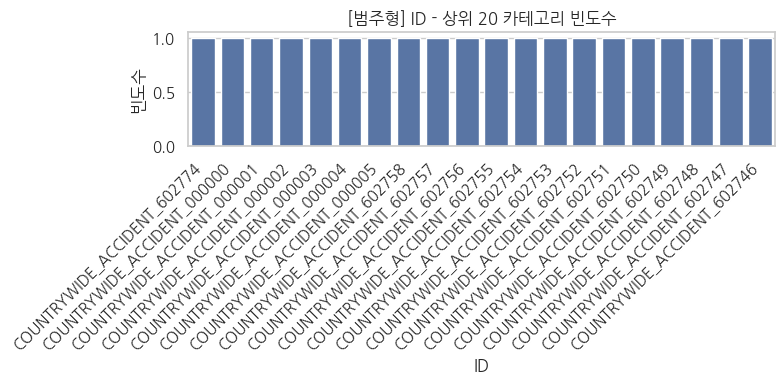

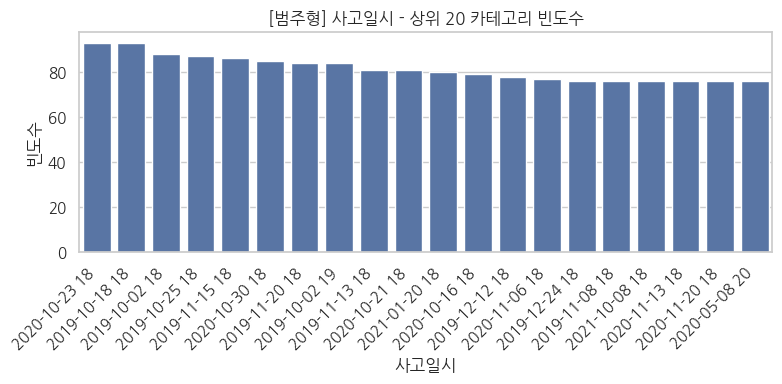

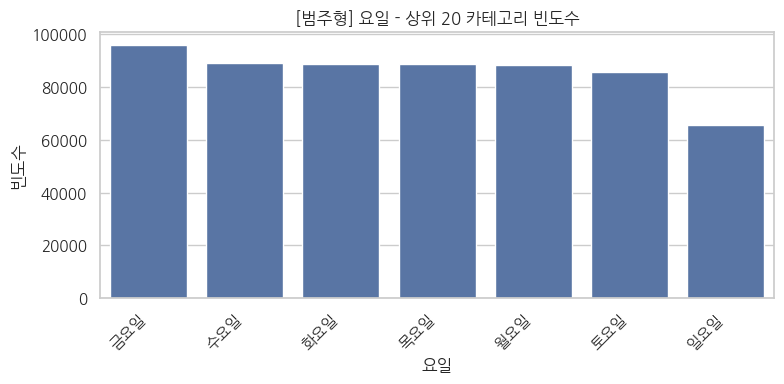

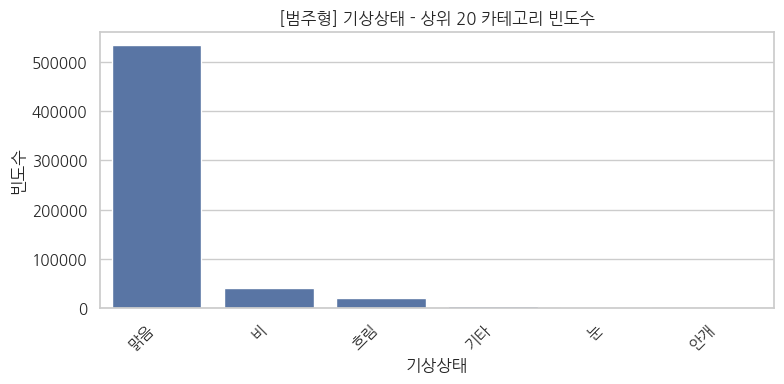

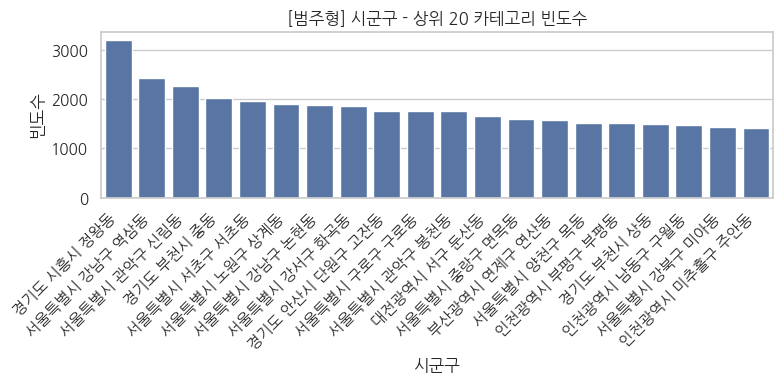

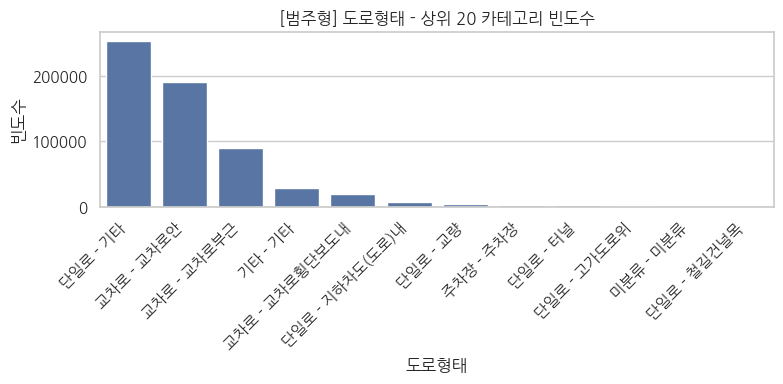

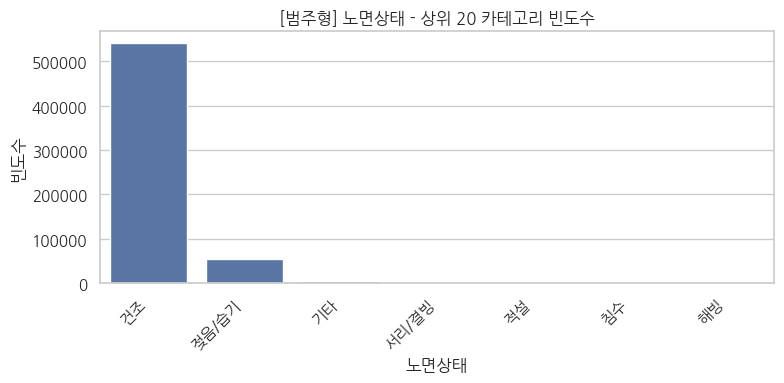

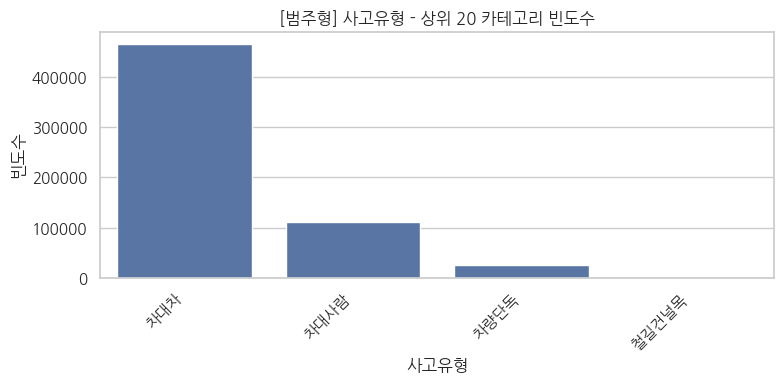

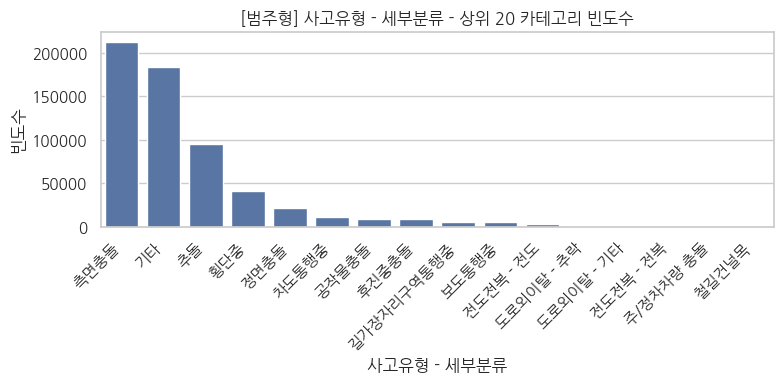

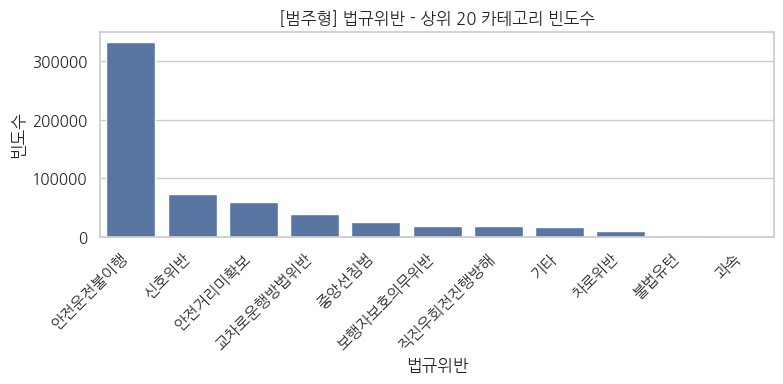

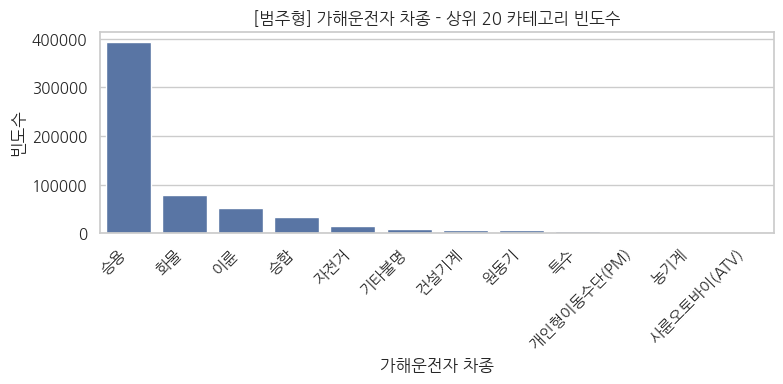

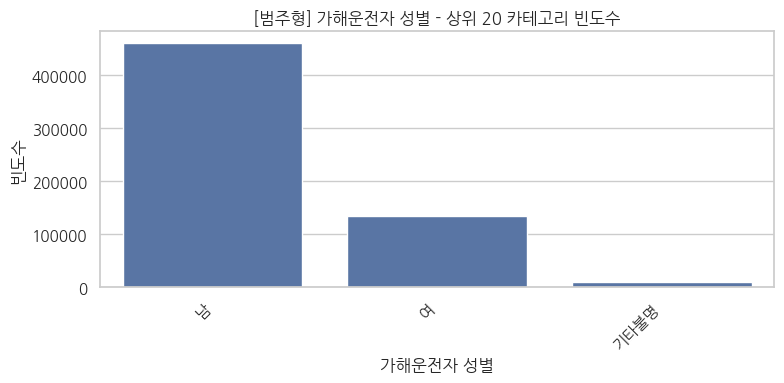

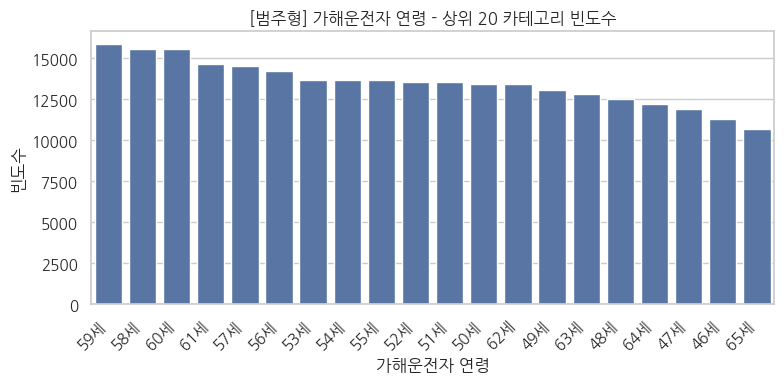

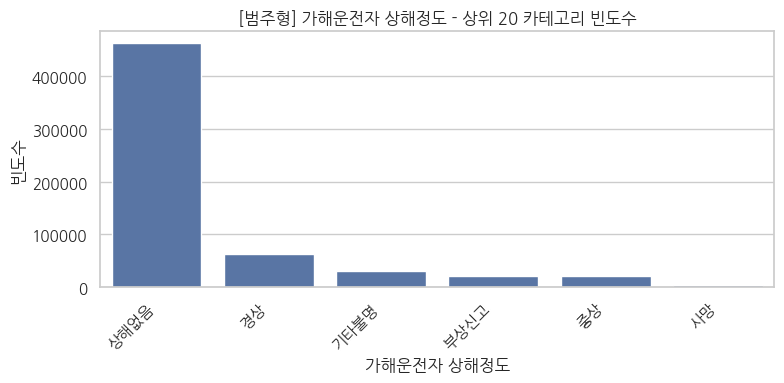

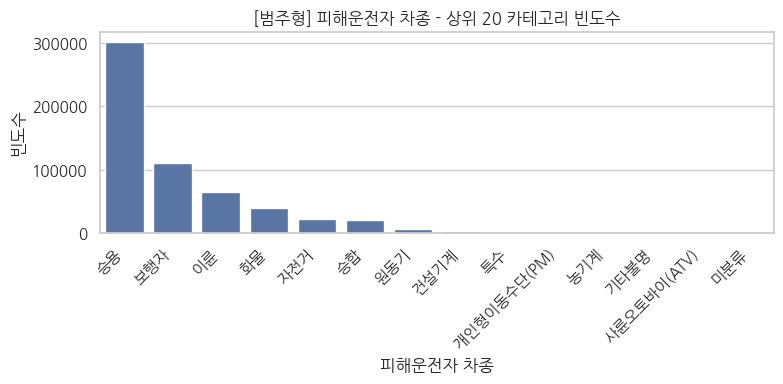

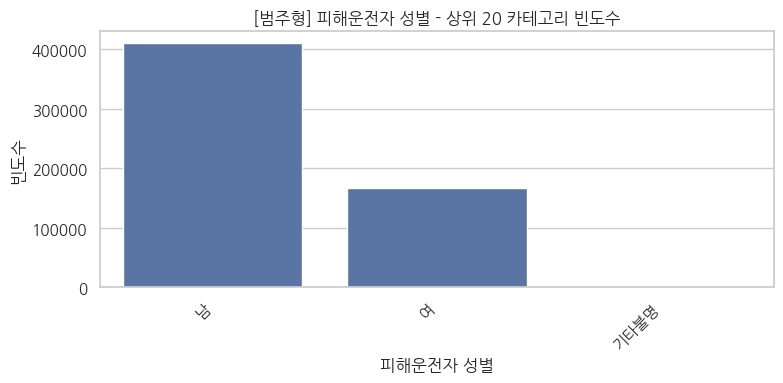

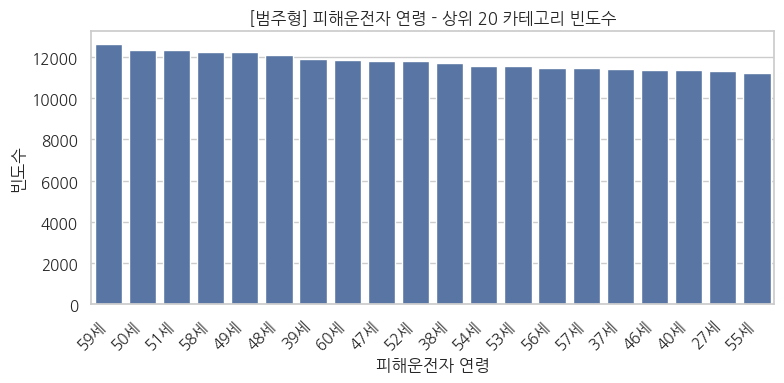

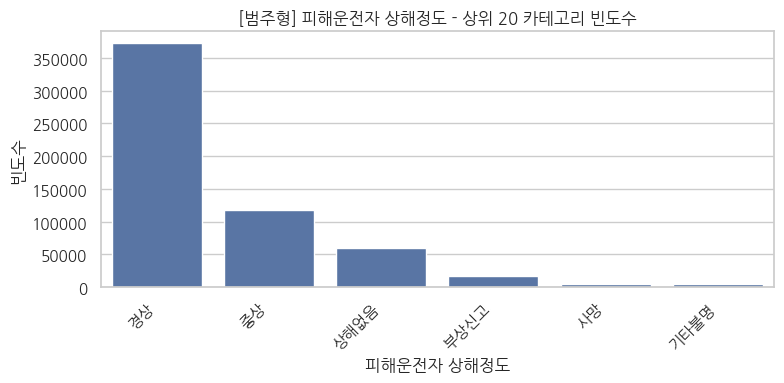

In [ ]:
# ==========================================
# 8. 모든 범주형 컬럼 bar chart
# ==========================================

TOP_N = 20  # 상위 몇 개 카테고리까지 시각화할지 설정

if len(categorical_cols) == 0:
    print("범주형 컬럼이 없어 bar chart를 그릴 수 없습니다.")
else:
    for col in categorical_cols:
        value_counts = df[col].value_counts().head(TOP_N)

        plt.figure(figsize=(8, 4))
        sns.barplot(x=value_counts.index.astype(str),
                    y=value_counts.values)
        plt.title(f"[범주형] {col} - 상위 {TOP_N} 카테고리 빈도수")
        plt.xlabel(col)
        plt.ylabel("빈도수")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


## 9. AI와의 차이